#문제

아래와 같이 사과 2개와 귤 3개 구매에 대한 그림과 코드를 예제로 주었습니다.
- 사과와 귤과 함께 바나나값이 200원이고 5개를 추가로 구매한 경우에 코드를 작성하시오.

그림 5-17 사과 2개와 귤 3개 구입


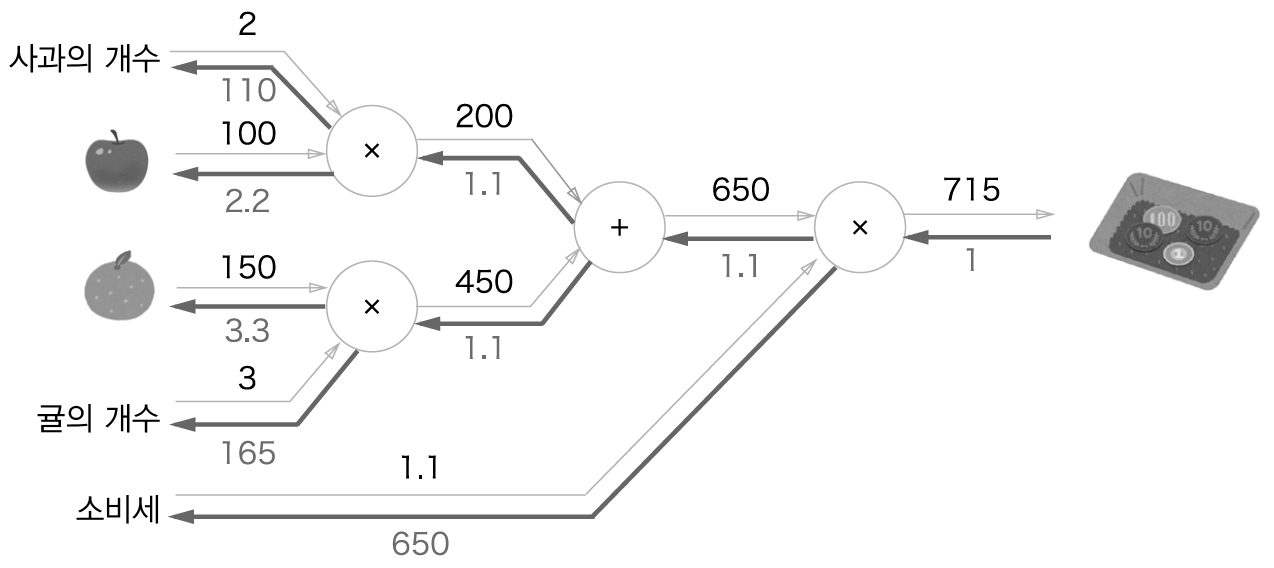





곱셈계층

In [ ]:
# 곱셈 계층
'''
역전파가 구현된 곱셈 레이어 클래스
'''
class MulLayer: # (x * y)
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # 입력 받은 값에 x에 대한 편미분 값인 y를 곱하여 x 노드로 보낸다.
        dy = dout * self.x  # 입력 받은 값에 y에 대한 편미분 값인 x를 곱하여 y 노드로 보낸다.

        return dx, dy


덧셈 계층

In [ ]:
class AddLayer: # (x + y)
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1   # 입력 받은 값에 x에 대한 편미분 값인 1을 곱하여 x 노드로 보낸다.
        dy = dout * 1   # 입력 받은 값에 y에 대한 편미분 값인 1을 곱하여 y 노드로 보낸다.

        return dx ,dy

In [ ]:
'''
위의 클래스를 사용하여 100원짜리 사과 2개와 150원짜리 오렌지 3개를 사고 10%의 부가세가 포함된 그래프의 기울기를 구함.
'''

apple = 100     # 사과 가격 : 100
apple_num =  2  # 사과 개수 : 2
orange = 150    # 오렌지 가격 : 150
orange_num = 3  # 오렌지 개수 : 3
tax = 1.1       # 부가세 10%

# Layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)                 # (1) 100원짜리 사과 2개 구매 -> 100 * 2
orange_price = mul_orange_layer.forward(orange, orange_num)             # (2) 150원짜리 오렌지 3개 구매 -> 150 * 3
all_price = add_apple_orange_layer.forward(apple_price, orange_price)   # (3) 구매한 사과와 오렌지의 가격을 더함 (100 * 2) + (150 * 3)
price = mul_tax_layer.forward(all_price, tax)                           # (4) 10%의 부가세를 부여함. ((100 * 2) + (150 * 3)) * 1.1

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)                           # (4) 부가세의 기울기와 사과와 오렌지의 가격에 대한 기울기를 구함.
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)   # (3) 사과의 가격과 오렌지의 가격에 대한 기울기를 구함.
dorange, dorange_num = mul_orange_layer.backward(dorange_price)             # (2) 개당 오렌지 가격과 오렌지 개수에 대한 기울기를 구함.
dapple, dapple_num = mul_apple_layer.backward(dapple_price)                 # (1) 개당 사과 가격과 사과 가격에 대한 기울기를 구함.

# print
# 구한 기울기 값들 출력
print("price:", int(price))
print("Apple gradient:", dapple)
print("Apple_num gradient:", int(dapple_num))
print("Orange gradient:", dorange)
print("Orange_num gradient:", int(dorange_num))
print("Tax gradient:", dtax)

price: 715
Apple gradient: 2.2
Apple_num gradient: 110
Orange gradient: 3.3000000000000003
Orange_num gradient: 165
Tax gradient: 650


#정답

In [ ]:

apple = 100     # 사과 가격 : 100
apple_num =  2  # 사과 개수 : 2
orange = 150    # 오렌지 가격 : 150
orange_num = 3  # 오렌지 개수 : 3
tax = 1.1       # 부가세 10%

banana = 200     # 바나나 가격 : 200
banana_num =  5  # 바나나 개수 : 5

# Layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
mul_banana_layer = MulLayer()   # 추가
add_apple_orange_layer = AddLayer()
add_banana_layer = AddLayer()   # 추가
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)                 # (1) 100원짜리 사과 2개 구매 -> 100 * 2
orange_price = mul_orange_layer.forward(orange, orange_num)             # (2) 150원짜리 오렌지 3개 구매 -> 150 * 3
banana_price = mul_banana_layer.forward(banana, banana_num)                    ######## 추가

apple_orange_price = add_apple_orange_layer.forward(apple_price, orange_price) ######## 수정
all_price = add_banana_layer.forward(apple_orange_price, banana_price)         ######## 수정
price = mul_tax_layer.forward(all_price, tax)                           # (4) 10%의 부가세를 부여함. ((100 * 2) + (150 * 3)) * 1.1

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)                           # (4) 부가세의 기울기와 사과와 오렌지의 가격에 대한 기울기를 구함.

dapple_orange_price, dbanana_price = add_apple_orange_layer.backward(dall_price)   ######## 수정


dapple_price, dorange_price = add_apple_orange_layer.backward(dapple_orange_price)   ######## 수정
dbanana, dbanana_num = mul_banana_layer.backward(dbanana_price)                      ######## 추가

dorange, dorange_num = mul_orange_layer.backward(dorange_price)             # (2) 개당 오렌지 가격과 오렌지 개수에 대한 기울기를 구함.
dapple, dapple_num = mul_apple_layer.backward(dapple_price)                 # (1) 개당 사과 가격과 사과 가격에 대한 기울기를 구함.

# print
# 구한 기울기 값들 출력
print("price:", int(price))
print("Apple gradient:", dapple)
print("Apple_num gradient:", int(dapple_num))
print("Orange gradient:", dorange)
print("Orange_num gradient:", int(dorange_num))
print("Banana gradient:", dbanana)                                          ######## 추가
print("Banana_num gradient:", int(dbanana_num))                             ######## 추가
print("Tax gradient:", dtax)

price: 1815
Apple gradient: 2.2
Apple_num gradient: 110
Orange gradient: 3.3000000000000003
Orange_num gradient: 165
Banana gradient: 5.5
Banana_num gradient: 220
Tax gradient: 1650
